In [36]:
import pandas as pd
import numpy as np
import os, time, datetime
from datetime import datetime
import glob
import matplotlib.pyplot as plt
from matplotlib import cm as CM
from matplotlib.colors import LogNorm,PowerNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean
import cartopy.io.img_tiles as cimgt
import shapely.geometry as sgeom
%matplotlib inline

In [2]:
import contextily as ctx
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

In [3]:
def search(s, path=os.path.abspath('.')):  #os.path.abspath(path)：绝对路径

    for z in os.listdir(path):
        if os.path.isdir(path + os.path.sep + z):  # os.path.sep:路径分隔符 linux下就用这个了’/’
            #print('Currnet:', path)
            path2 = os.path.join(path, z) #；os.path.join(): 常用来链接路径
            #print('future:', path2)
            search(s, path2)
        elif os.path.isfile(path + os.path.sep + z): #检验给出的路径是否是一个文件：os.path.isfile()来自 <http://blog.csdn.net/devil_2009/article/details/7941241>
            if s in z:
                #print(os.path.join(path, z))
                filenames.append(os.path.join(path, z))
                #with open(path + os.path.sep + z, 'r') as fr:
                #    with open('save.txt', 'a') as fw:
                #        fw.write(path + '\t' + fr.read())

In [13]:
def plotMap():
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='natural-earth-1', resolution='large',extent=[60, 95, 30, 60])
    #ax.background_img(name='cross-blend-hypso', resolution='clarge',extent=[60, 95, 30, 60])
    #Zoom in
    ax.set_extent([60, 95, 32, 52])

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    #ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = '/data/c03n02/cliu/data/map/CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.5)
    
    #add_basemap(ax, zoom=10)
    filename='/users1j/cliu/soft/anaconda2/envs/pygrib/lib/python3.6/site-packages/cartopy/data/raster/natural_earth/cross-blend-hypso_clarge.tif'
    img = plt.imread(filename)
    ax.imshow(img, origin='upper', extent=[60, 95, 32, 52], transform=ccrs.PlateCarree())
    newcmap = cmocean.tools.crop_by_percent(cmocean.cm.balance, 1, which='both', N=20)
    
    plt.scatter(lon,lat,#latlon=True,
          c=ccn, s=20,
          #cmap=newcmap,norm=PowerNorm(gamma=0.7),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('rainbow',40),norm=LogNorm(vmin=max(ccn.min(),0.1),clip=True),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          cmap=newcmap,alpha=0.8,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    plt.colorbar(label=r'CCN/cm^3')
    #plt.clim(0,1800)
    plt.title("FNL", fontsize=20)
    return fig, ax
# make legend with dummy points
'''
    for a in [0,10,20]:
        plt.scatter([], [], c='k', alpha=0.5, s=(3*a+10),
                label=str(a)+'')
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left',title= 'AQI',
#           bbox_to_anchor=(,0),ncol=5)
    plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left',title= 'Tb-temp',
           bbox_to_anchor=(0,-0.08,1,0.2),
           mode="expand", borderaxespad=0, ncol=6)
    plt.title("2013-2018 Summer", fontsize=20)
'''  

'\n    for a in [0,10,20]:\n        plt.scatter([], [], c=\'k\', alpha=0.5, s=(3*a+10),\n                label=str(a)+\'\')\n#plt.legend(scatterpoints=1, frameon=False,\n#           labelspacing=1, loc=\'lower left\',title= \'AQI\',\n#           bbox_to_anchor=(,0),ncol=5)\n    plt.legend(scatterpoints=1, frameon=False,\n           labelspacing=1, loc=\'lower left\',title= \'Tb-temp\',\n           bbox_to_anchor=(0,-0.08,1,0.2),\n           mode="expand", borderaxespad=0, ncol=6)\n    plt.title("2013-2018 Summer", fontsize=20)\n'

In [5]:
#times=pd.to_datetime(filename[66:74],format='%Y%m%d')
filenames=[]
filename_fnl="trajectories.txt"
search('partposit_20150421120000', '.')
filenames=sorted(filenames)#;防止顺序不对
for filename in filenames:
    print(filename)
    data=pd.read_csv(filename_fnl,sep='\s+',header=None,skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    names=['npoint','itramem','xlon', 'ylat', 'ztra1','topo', 'pvi', 'qvi', 'rhoi', 'hmix', 'tri', 'tti','xmass']
    cities=pd.read_csv(filename,sep='\s+',names=names,skiprows=[1],na_values=[-9999])
    cities=cities[cities['npoint']==1]
    #print(cities)
# Extract the data we're interested in
    lont=data.iloc[0::4,2]
    latt=data.iloc[0::4,3]
    heightt=data.iloc[0::4,4]
    lon1t=data.iloc[1::4,2]
    lat1t=data.iloc[1::4,3]
    height1t=data.iloc[1::4,4]
    lon2t=data.iloc[2::4,2]
    lat2t=data.iloc[2::4,3]
    height2t=data.iloc[2::4,4]
    lon3t=data.iloc[3::4,2]
    lat3t=data.iloc[3::4,3]
    height3t=data.iloc[3::4,4]

    lat = cities['ylat'].values
    lon = cities['xlon'].values
    ccn = cities['ztra1'].values
#tcb = cities[''].values
    ccn_max=np.nanmax(ccn)
    lat_max=np.nanmax(lat)
    lon_max=np.nanmax(lon)
    lat_min=np.nanmin(lat)
    lon_min=np.nanmin(lon)
    #print(ccn_max)
    ccn_min=np.nanmin(ccn)
##print(ccn_min)
    ccn_max=np.nanmax(ccn)
#print(ccn_max)
    ccn_min=np.nanmin(ccn)
#print(ccn_min)
#tcb_max=np.nanmax(tcb)

./partposit_20150421120000


from PIL import Image
Image.MAX_IMAGE_PIXELS = None
#https://stackoverflow.com/questions/25705773/image-cropping-tool-python

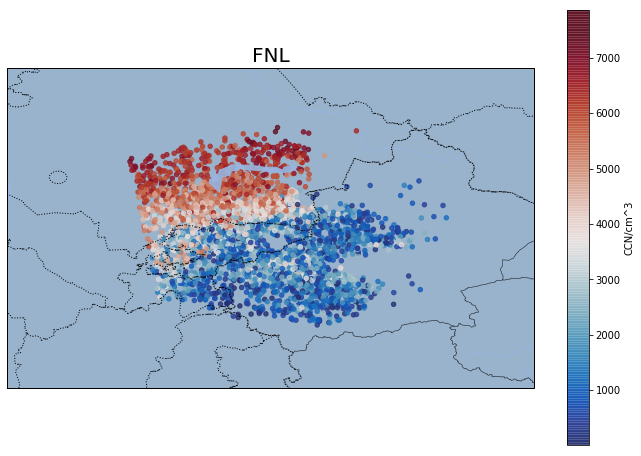

In [6]:
fig, ax= plotMap()

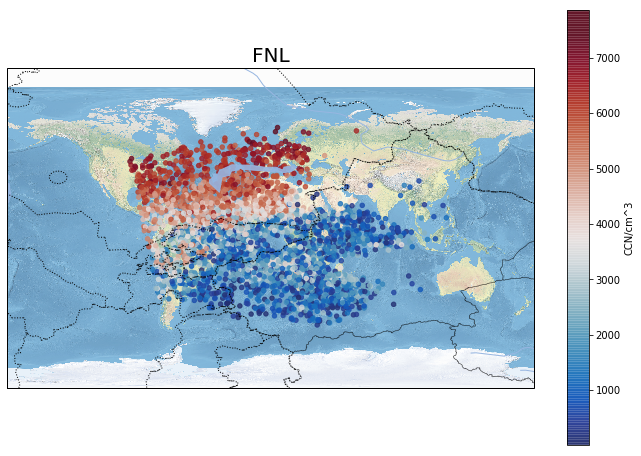

In [11]:
fig, ax= plotMap()

/users1j/cliu/soft/anaconda2/envs/pygrib/lib/python3.6/site-packages/PIL/Image.py:2600: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


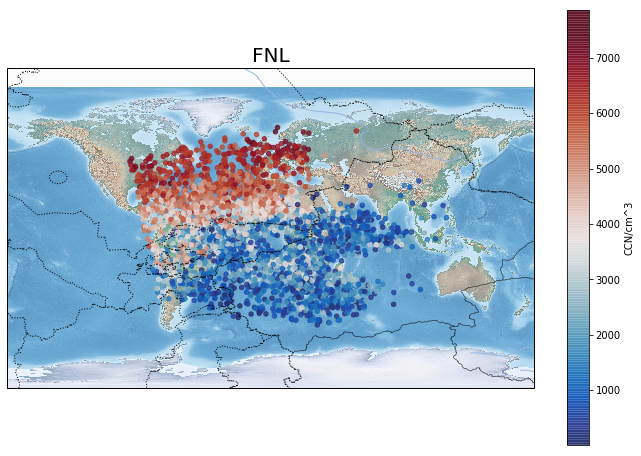

In [14]:
fig, ax= plotMap()

/users1j/cliu/soft/anaconda2/envs/pygrib/lib/python3.6/site-packages/PIL/Image.py:2600: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


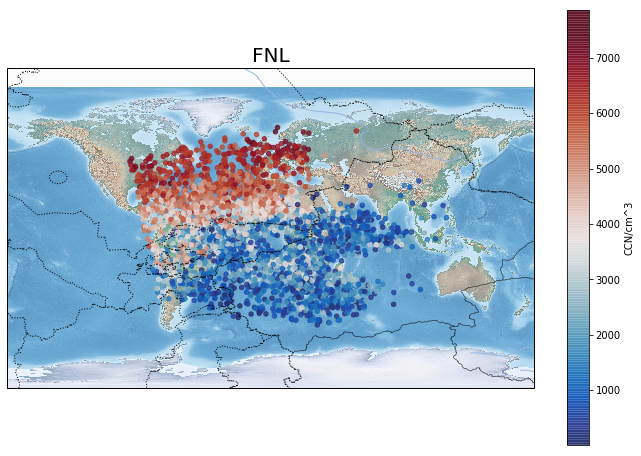

In [21]:
fig, ax= plotMap()

In [30]:
def plotMap1():
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='natural-earth-1', resolution='large',extent=[60, 95, 30, 60])
    #ax.background_img(name='cross-blend-hypso', resolution='clarge',extent=[60, 95, 30, 60])
    #Zoom in
    ax.set_extent([60, 95, 32, 52])

    #Add map features
    stamen_terrain = cimgt.Stamen('terrain-background')
    # Add the Stamen data at zoom level 8.
    ax.add_image(stamen_terrain, 8)
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    #ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = '/data/c03n02/cliu/data/map/CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.5)
    
    #add_basemap(ax, zoom=10)
    #filename='/users1j/cliu/soft/anaconda2/envs/pygrib/lib/python3.6/site-packages/cartopy/data/raster/natural_earth/cross-blend-hypso_clarge.tif'
    #img = plt.imread(filename)
    #ax.imshow(img, origin='upper', extent=[60, 95, 32, 52], transform=ccrs.PlateCarree())
    newcmap = cmocean.tools.crop_by_percent(cmocean.cm.balance, 1, which='both', N=20)
    
    plt.scatter(lon,lat,#latlon=True,
          c=ccn, s=20,
          #cmap=newcmap,norm=PowerNorm(gamma=0.7),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('rainbow',40),norm=LogNorm(vmin=max(ccn.min(),0.1),clip=True),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          cmap=newcmap,alpha=0.8,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    #plt.colorbar(label=r'CCN/cm^3')
    plt.colorbar(label=r'Height/m', fraction=0.046)
    #plt.clim(0,(ccn_max//1000+1)*1000)
    return fig, ax

In [38]:
def plotMap2():
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    ax.set_extent([60, 95, 32, 52])

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    #ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = '/data/c03n02/cliu/data/map/CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.5)
    
    #add_basemap(ax, zoom=10)
    #filename='/users1j/cliu/soft/anaconda2/envs/pygrib/lib/python3.6/site-packages/cartopy/data/raster/natural_earth/cross-blend-hypso_clarge.tif'
    #img = plt.imread(filename)
    #ax.imshow(img, origin='upper', extent=[60, 95, 32, 52], transform=ccrs.PlateCarree())
    newcmap = cmocean.tools.crop_by_percent(cmocean.cm.balance, 1, which='both', N=20)
    
    plt.scatter(lon,lat,#latlon=True,
          c=ccn, s=20,
          #cmap=newcmap,norm=PowerNorm(gamma=0.7),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('rainbow',40),norm=LogNorm(vmin=max(ccn.min(),0.1),clip=True),alpha=0.5,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          cmap=newcmap,alpha=0.8,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    #plt.colorbar(label=r'CCN/cm^3')
    plt.colorbar(label=r'Height/m', fraction=0.046)
    plt.clim(0,(ccn_max//1000+1)*1000)
    # turn the lons and lats into a shapely LineString
    track = sgeom.LineString(zip(lont, latt))
    # buffer the linestring by two degrees (note: this is a non-physical
    # distance)
    track_buffer = track.buffer(0.1)
    ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                      facecolor='#C8C2C6', alpha=0.5)
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='k')
    plt.title("FNL", fontsize=20)
    return fig, ax

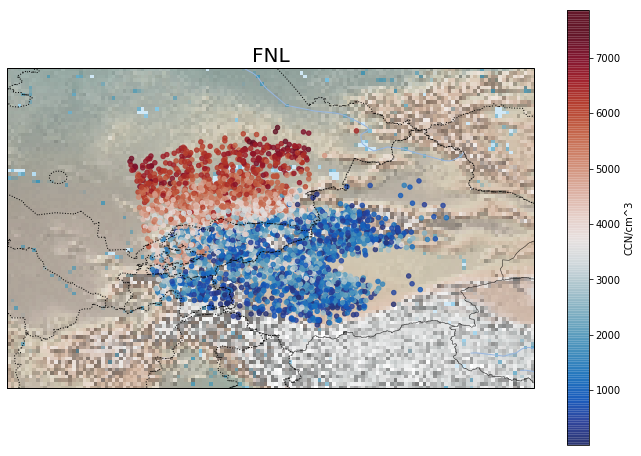

In [25]:
fig, ax= plotMap1()
#map is not very high resolution!

/users1j/cliu/soft/anaconda2/envs/pygrib/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


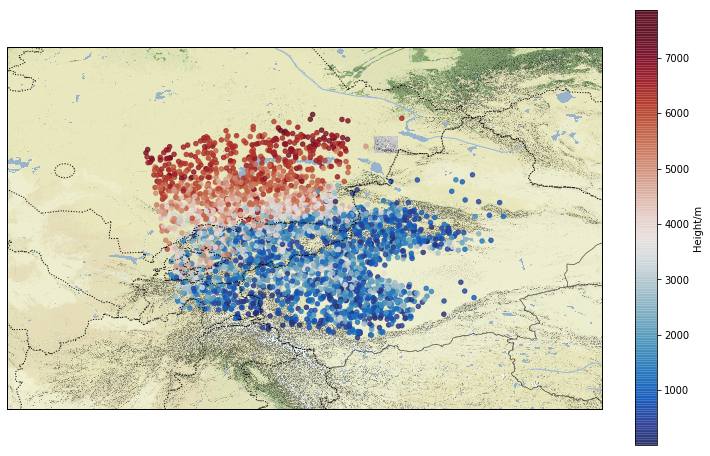

In [32]:
fig, ax= plotMap1()

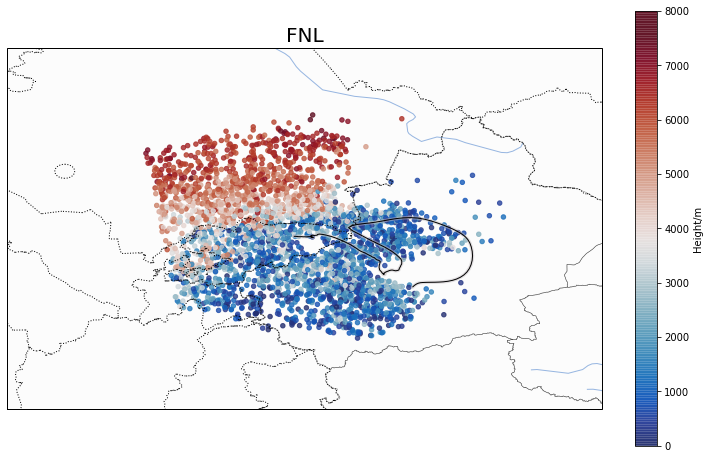

In [39]:
fig, ax= plotMap2()

In [15]:
#from gmplot import gmplot
#gmap = gmplot.GoogleMapPlotter(45.766956, 80.438481, 13)
#gmap.scatter(lat, lon, '#3B0B39', size=40, marker=False)#
#gmap.draw("my_map.html")